# Predicting Solar Power Generation Based on Weather Data

Renewable energies are a growing necessity in this current age. Fossil fuels are bound to run out and a solution to our fast approaching energy crisis must be found. Solar power is a promising path to this problem, as photovoltaics are becoming increasingly efficient and more common. However, harnessing the power of the sun is still problematic in some cases. Not anywhere and anytime can it be beneficial to use solar panels.

In this project, weather attributes are tested for correlations to solar power generation. Linear regression models were used to predict how well the weather at the time of day affects the solar irradiance.

To begin, a data set was found. The National Solar Radiation Database provided a large enough set of data with sufficient variables to test on.

Before loading the set, a detailed analysis was completed on the data. Noticeably, a huge amount of points were not applicable to our goals. The nighttime data made up a vast majority of these data points, hence their removal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_excel('2017 Data.xlsx')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2017,1,1,8,30,50,520,139,80.16,0.602,89.73
1,2017,1,1,9,30,67,719,283,72.58,0.579,84.17
2,2017,1,1,10,30,72,826,394,67.03,0.564,69.33
3,2017,1,1,11,30,73,868,453,64.08,0.561,59.33
4,2017,1,1,12,30,72,873,453,64.09,0.565,57.18
5,2017,1,1,13,30,67,844,396,67.07,0.570,56.53
6,2017,1,1,14,30,58,769,288,72.63,0.569,62.19
7,2017,1,1,15,30,42,604,144,80.23,0.557,76.78
8,2017,1,2,8,30,42,0,42,80.16,1.862,93.07
9,2017,1,2,9,30,85,0,85,72.55,2.012,89.52


After looking at the data, a plot was made between variables that seemed to have a decent correlation with each other.

First, the daylight hours were plotted against GHI (or Global Horizontal Irradiance). GHI is the radiation measured by a surface that is horizontal to the ground. It is based directly upon Direct Normal Irradiance (DNI) and Diffuse Horizontal Irradiance (DHI). DNI is the radiation coming directly in a straight line from the sun and DHI is the radiation coming from the sun in scattered directions (clouds and atmospheric particles). GHI has a direct relationship with solar intensity and therefore solar power. 

GHI will be the y variable to solve for.

Text(0,0.5,'GHI at Noon')

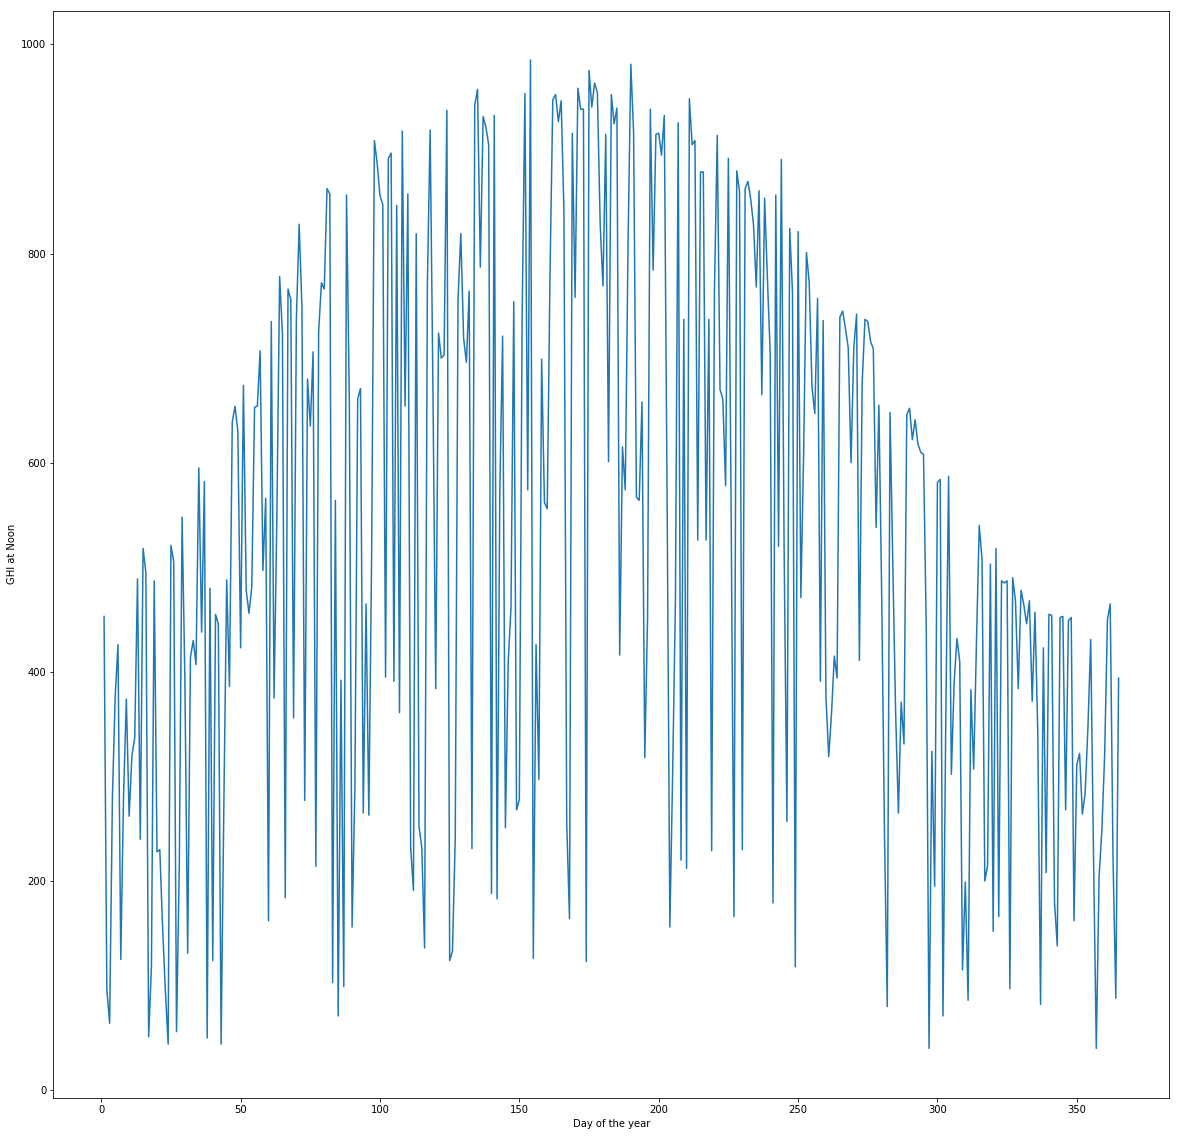

In [2]:
nsamp, natt = df.shape

#in order to measure the solar radiance for each day, the GHI for noon of each day was pulled from the data set
#along with their corresponding solar zenith angle, precipitable water, and relative humidity
hr = np.array(df['Hour'])
Day = np.array(df['Day'])
GHI = np.array(df['GHI'])
SZA = np.array(df['Solar Zenith Angle'])
PW = np.array(df['Precipitable Water'])
RH = np.array(df['Relative Humidity'])

day_of_yr = np.arange(1,366)
pkGHI = np.zeros(365)
pkSZA = np.zeros(365)
pkPW = np.zeros(365)
pkRH = np.zeros(365)
dayInd = 0

for i in range(nsamp):
    if (hr[i] == 12):
        pkGHI[dayInd] = GHI[i]
        pkSZA[dayInd] = SZA[i]
        pkPW[dayInd] = PW[i]
        pkRH[dayInd] = RH[i]
        dayInd  = dayInd + 1

plt.figure(figsize=(20,20))
plt.plot(day_of_yr,pkGHI)
plt.xlabel('Day of the year')
plt.ylabel('GHI at Noon')

From this plot, it is shown that GHI has somewhat of a relationship with the daylight hours throughout the year. The middle hours represents the summertime, which makes logical sense for GHI to be higher. This is because it is sunnier and the day is longer at those times.

Next, other weather attributes were looked at for correlations to GHI. The solar zenith angle, which is the angle between the vertical and the sun's position, was plotted.


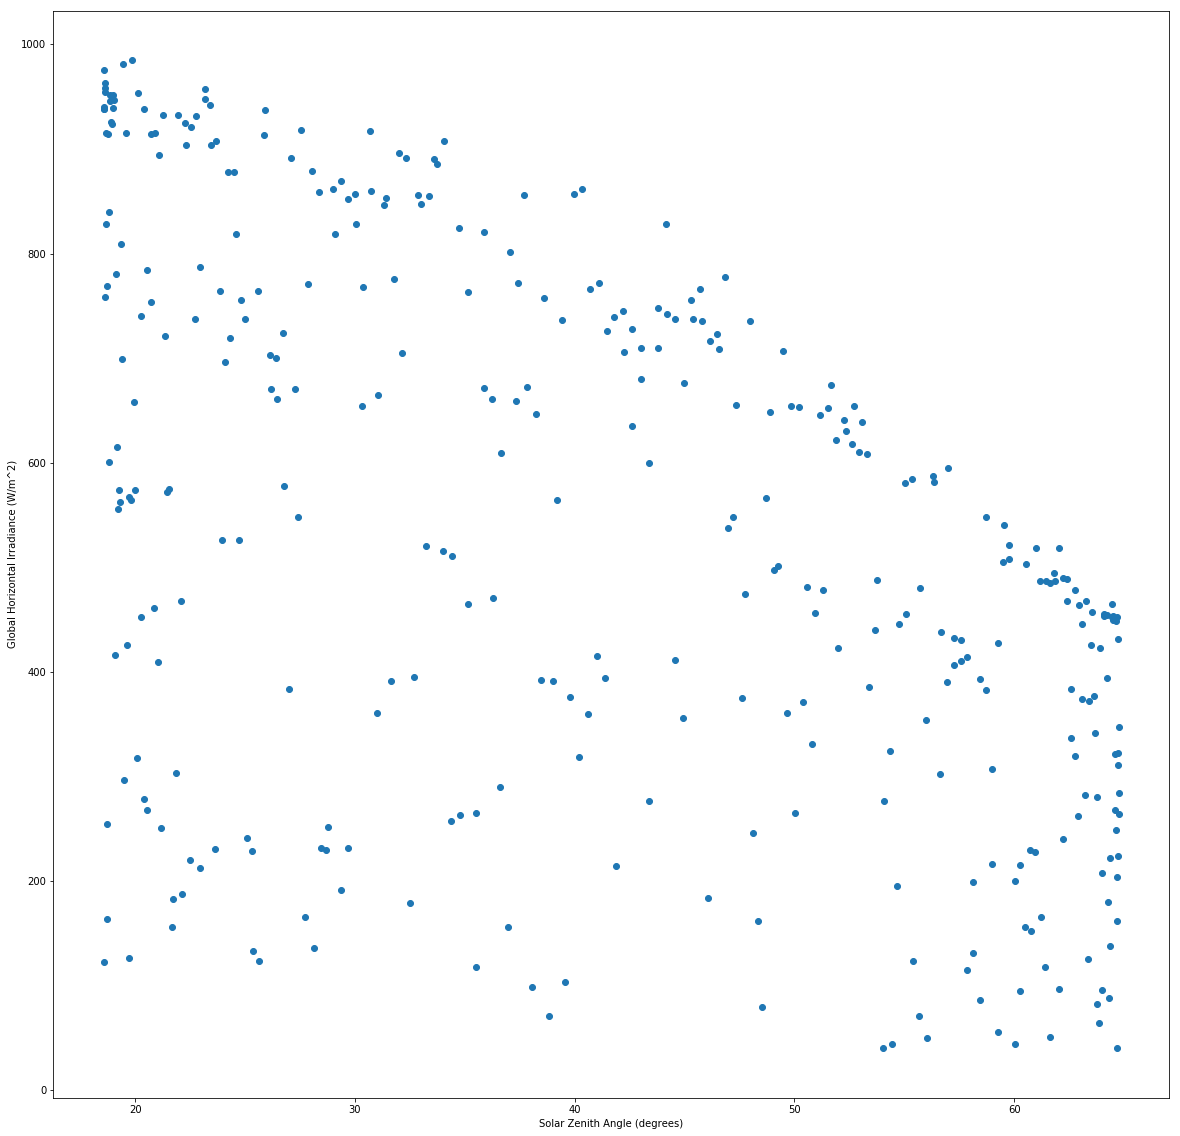

In [3]:
#Graphing random points for one variable
plt.figure(figsize=(20,20))
plt.xlabel('Solar Zenith Angle (degrees)')
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.scatter(pkSZA,pkGHI) 

    
#y1 = np.array(df['Dew Point'])
#y2 = np.array(df['Temperature']) 
#y = y2-y1 #the temperature subtracting the dew point determines likelihood of no rain (0 means definitely raining)
#x1 = np.array(df['DHI']) #latitude as a variable
#x2 = np.array(df['DNI']) #longitude as a variable



The solar zenith angle most definitely has a good correlation with GHI. It is almost a clear linear relationship with some noise underneath. 

Following solar zenith angle, the next variable that was used was precipitable water, simply known as rainwater in the atmosphere.

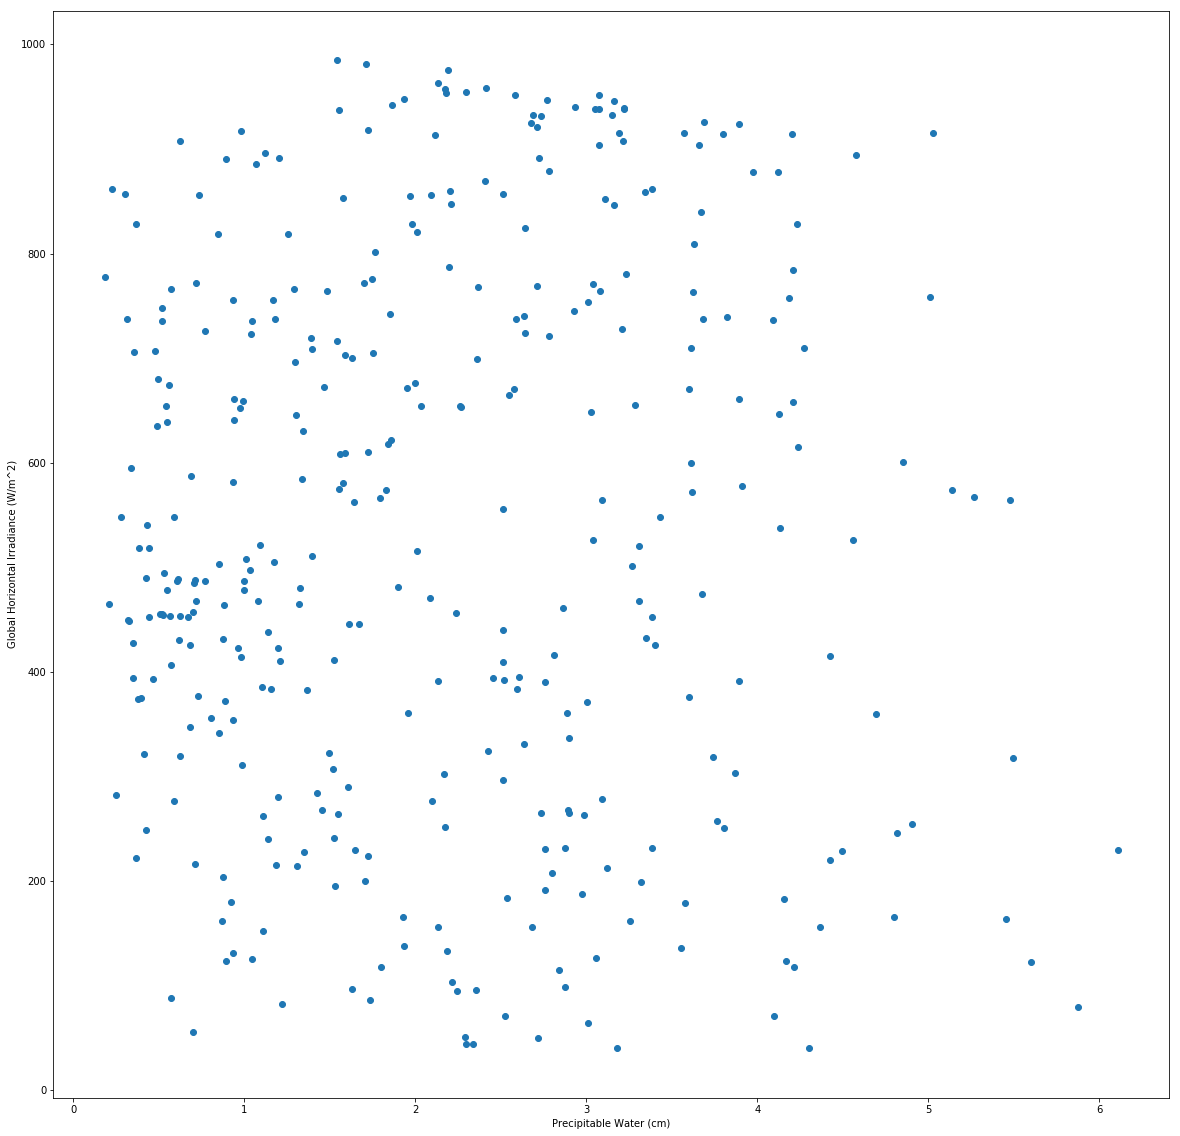

In [4]:
#Graphing random points for one variable
plt.figure(figsize=(20,20))
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Precipitable Water (cm)')
plt.scatter(pkPW,pkGHI)

Precipitable water seemed to be a good variable to test against, since usually rainy days are not very sunny. However, precipitable water does not necessarily indicate it will rain, but rather how much potential rain there can be. So, this did not seem to give a very good correlation.

On to the next variable: relative humidity, or the moisture in the air.

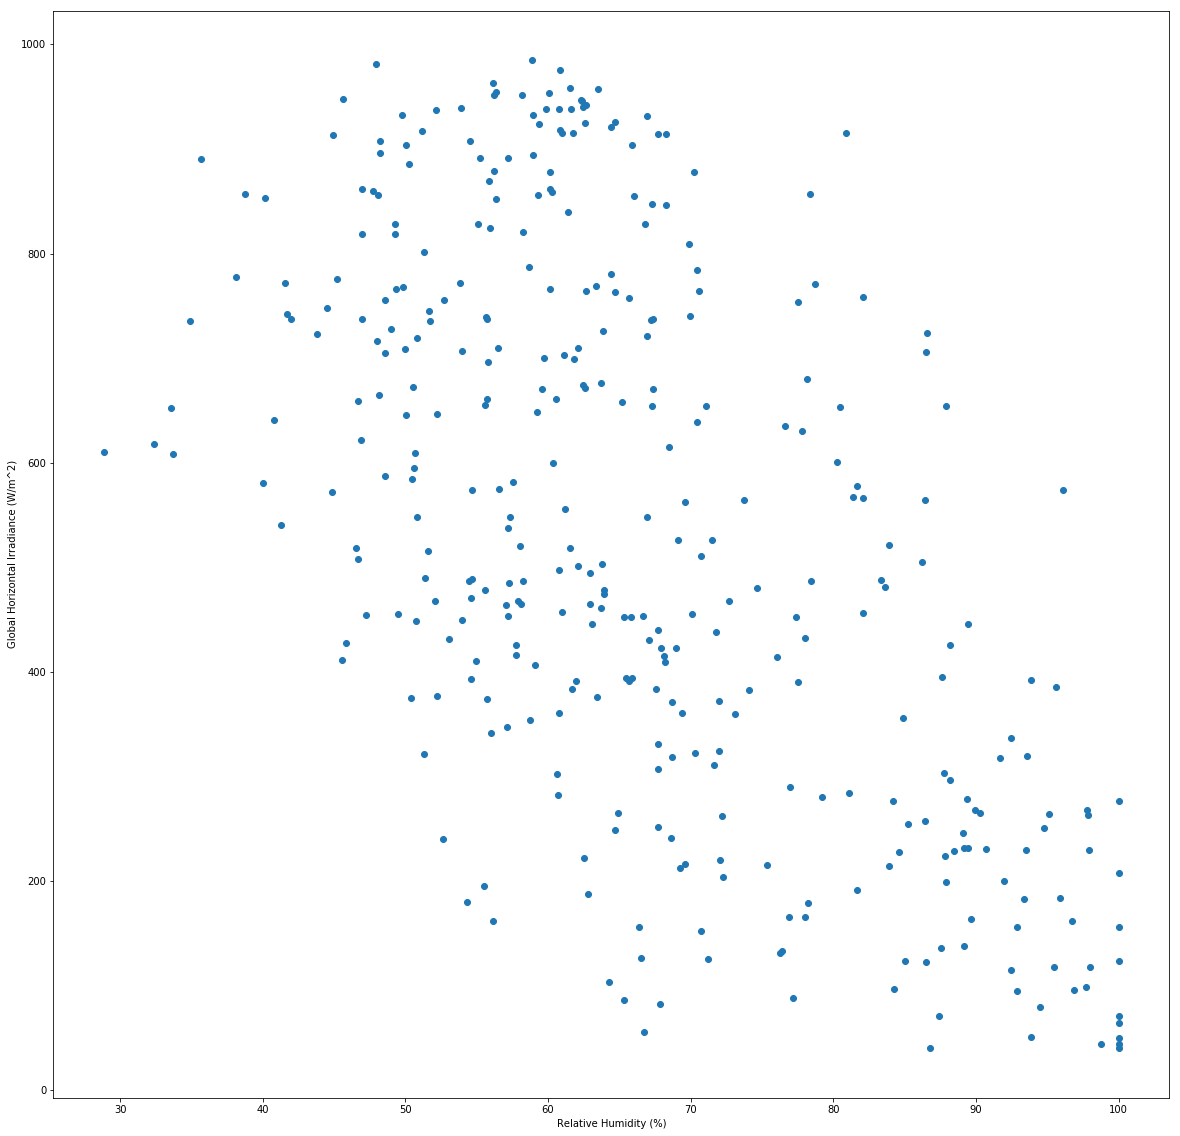

In [5]:
#Graphing random points for one variable
plt.figure(figsize=(20,20))
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Relative Humidity (%)')
plt.scatter(pkRH,pkGHI)

Relative humidity gives somewhat of a general shape/fit. A weaker linear relationship could be visualized through the middle of the points. It produced a more useful graph than what precipitable water generated. 

Many more variables were tested against GHI, but no correlations were found. They often showed up as a wall of data points with no real relationship between the two variables. With that, the attributes that were tested above were used as variables for a linear regression model for prediction of GHI. Data from 2017 was treated as the training data.


In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [7]:
#Using 2017 data as training data and fitting it as a linear model for one variable
ytrain = pkGHI
Xtrain_SZ = pkSZA.reshape(-1,1)
regr.fit(Xtrain_SZ,ytrain)
print('The Coefficient is: '+str(regr.coef_))
print('The Intercept is '+str(regr.intercept_))

The Coefficient is: [-8.36036629]
The Intercept is 874.2504972575097


Text(0.5,0,'Solar Zenith Angle (degrees)')

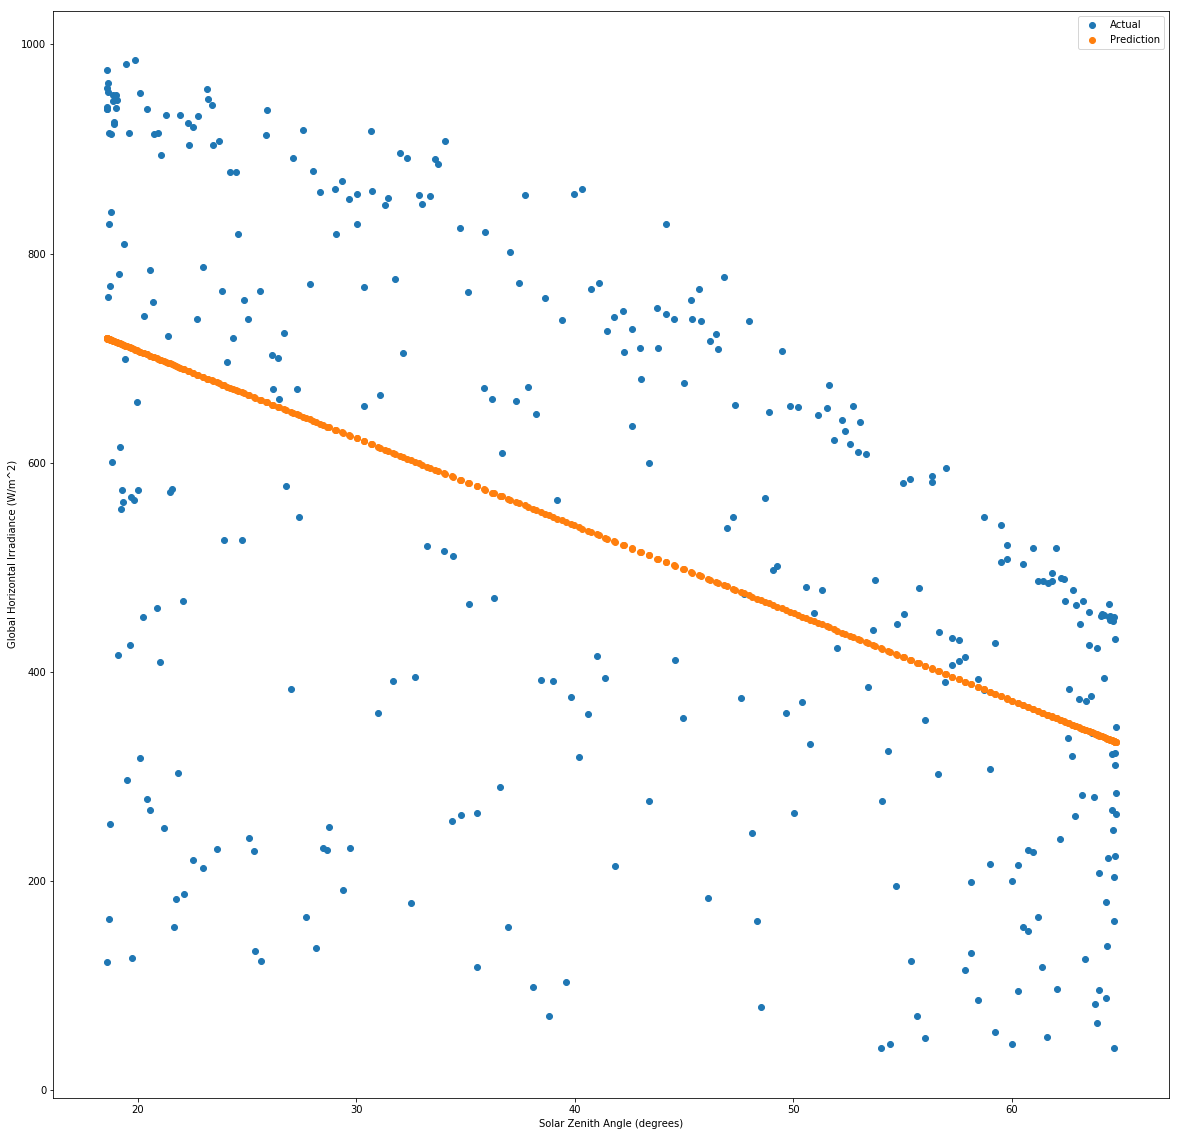

In [8]:
ytrain_pred_SZ = regr.predict(Xtrain_SZ)
plt.figure(figsize=(20,20))
plt.scatter(Xtrain_SZ, ytrain)
plt.scatter(Xtrain_SZ,ytrain_pred_SZ)
plt.legend(['Actual','Prediction'])
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Solar Zenith Angle (degrees)')

In [9]:
#Printing the accuracy of the data out of 1
regr.score(Xtrain_SZ,ytrain)

0.263649719124344

In [10]:
#Calculating the RSS
RSS = np.mean((ytrain-ytrain_pred_SZ)**2)
ym = np.mean(ytrain)
syy = np.mean((ytrain-ym)**2)
RSS_train = RSS/(syy)
RSS_train

0.736350280875656

In [11]:
#Using 2017 data as training data and fitting it as a linear model for one variable
Xtrain_PW = pkPW.reshape(-1,1)
regr.fit(Xtrain_PW,ytrain)
print('The Coefficient is: '+str(regr.coef_))
print('The Intercept is: '+str(regr.intercept_))

The Coefficient is: [1.95610163]
The Intercept is: 525.363800814888


Text(0.5,0,'Precipitable Water (cm)')

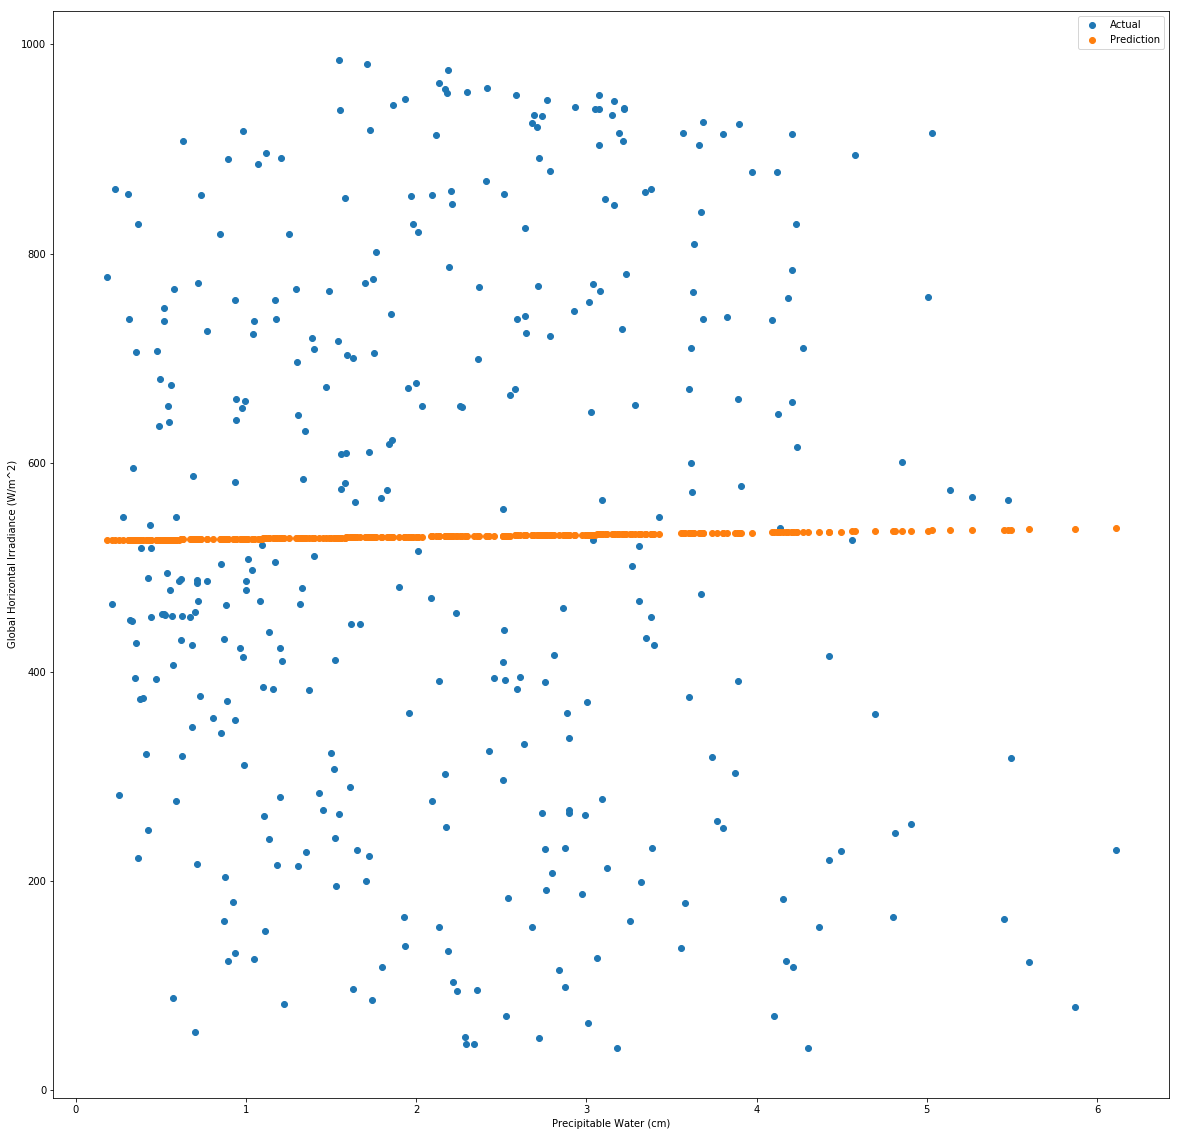

In [12]:
ytrain_pred_PW = regr.predict(Xtrain_PW)

plt.figure(figsize=(20,20))
plt.scatter(Xtrain_PW,ytrain)
plt.scatter(Xtrain_PW,ytrain_pred_PW)
plt.legend(['Actual','Prediction'])
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Precipitable Water (cm)')

In [13]:
#Printing the accuracy of the data
regr.score(Xtrain_PW,ytrain) 

9.440300550356273e-05

In [14]:
#Using 2017 data as training data and fitting it as a linear model for one variable
Xtrain_RH = pkRH.reshape(-1,1)
regr.fit(Xtrain_RH,ytrain)
print('The Coefficient is: '+str(regr.coef_))
print('The Intercept is: '+str(regr.intercept_))

The Coefficient is: [-9.88098508]
The Intercept is: 1187.791333183427


Text(0.5,0,'Relative Humidity (%)')

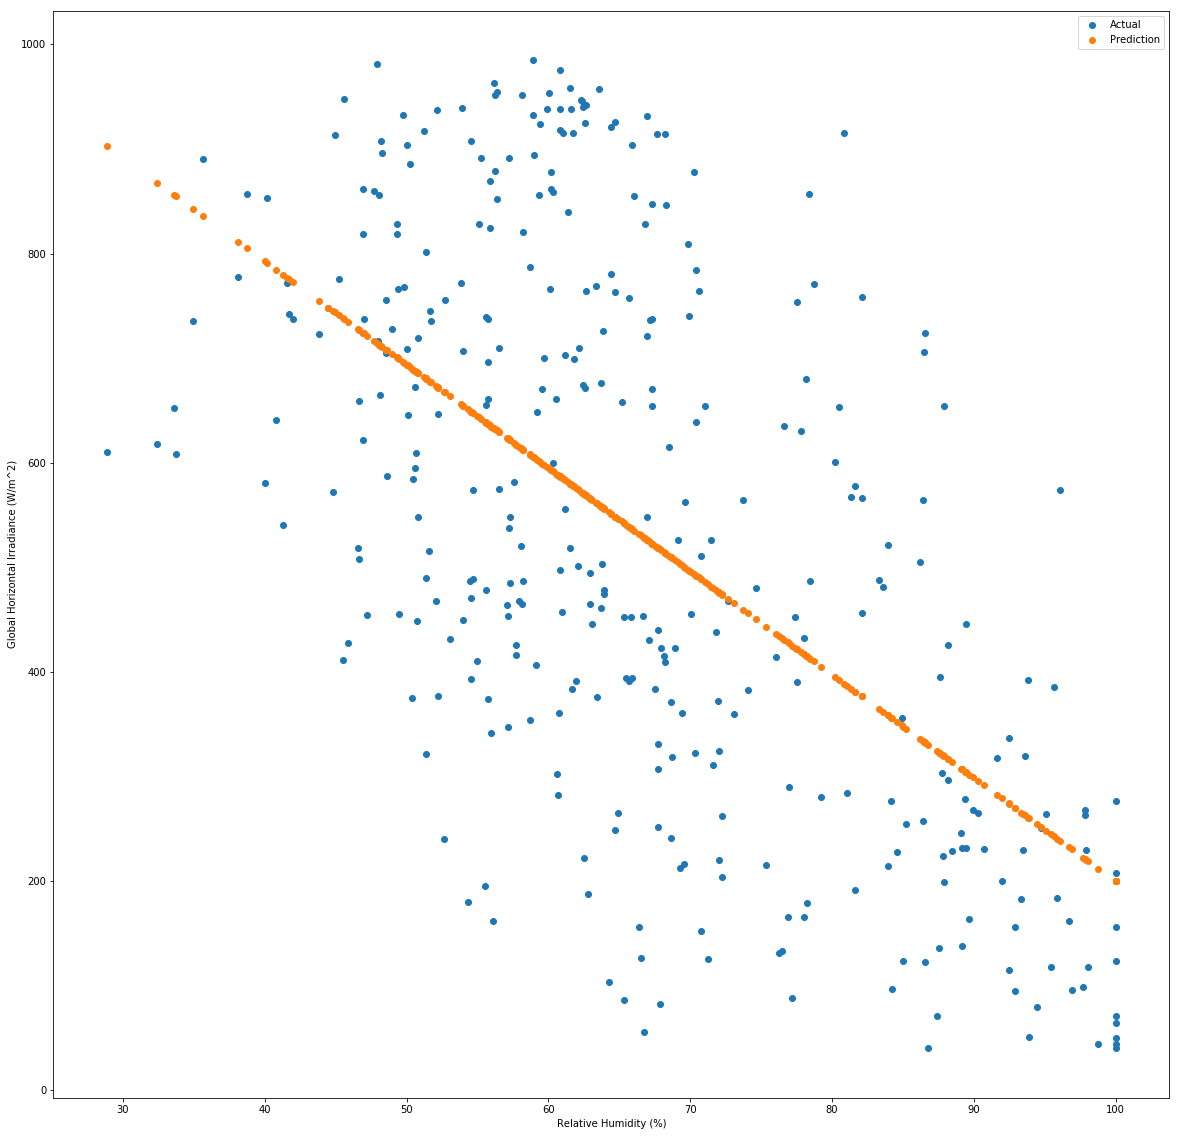

In [15]:
ytrain_pred_RH = regr.predict(Xtrain_RH)

plt.figure(figsize=(20,20))
plt.scatter(Xtrain_RH, ytrain)
plt.scatter(Xtrain_RH,ytrain_pred_RH)
plt.legend(['Actual','Prediction'])
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Relative Humidity (%)')

In [16]:
#Printing the accuracy
regr.score(Xtrain_RH,ytrain)

0.34806607900142805

Analyzing all of the linear models for each one of the variables indicates a decent factor of correlation between GHI and solar zenith angle and GHI and relative humidity. As predicted, GHI and precipitable water did not generate a favorable factor at all as compared to the other two variables. 

Going forward, solar zenith angle and relative humidity were used to generate a better linear model for predicting GHI. Precipitable water was left out as it had a low level of correlation. 

In [17]:
#Using 2017 data as training data and fitting it as a linear model for all chosen variables
ytrain = pkGHI
Xtrain = np.column_stack((pkSZA.reshape(-1,1),pkRH.reshape(-1,1)))
regr.fit(Xtrain,ytrain)
print('The Coefficients are: '+str(regr.coef_))
print('The Intercept is: '+str(regr.intercept_))

The Coefficients are: [-7.81384418 -9.40031678]
The Intercept is: 1477.8960149561528


Text(0.5,0,'Day of the year')

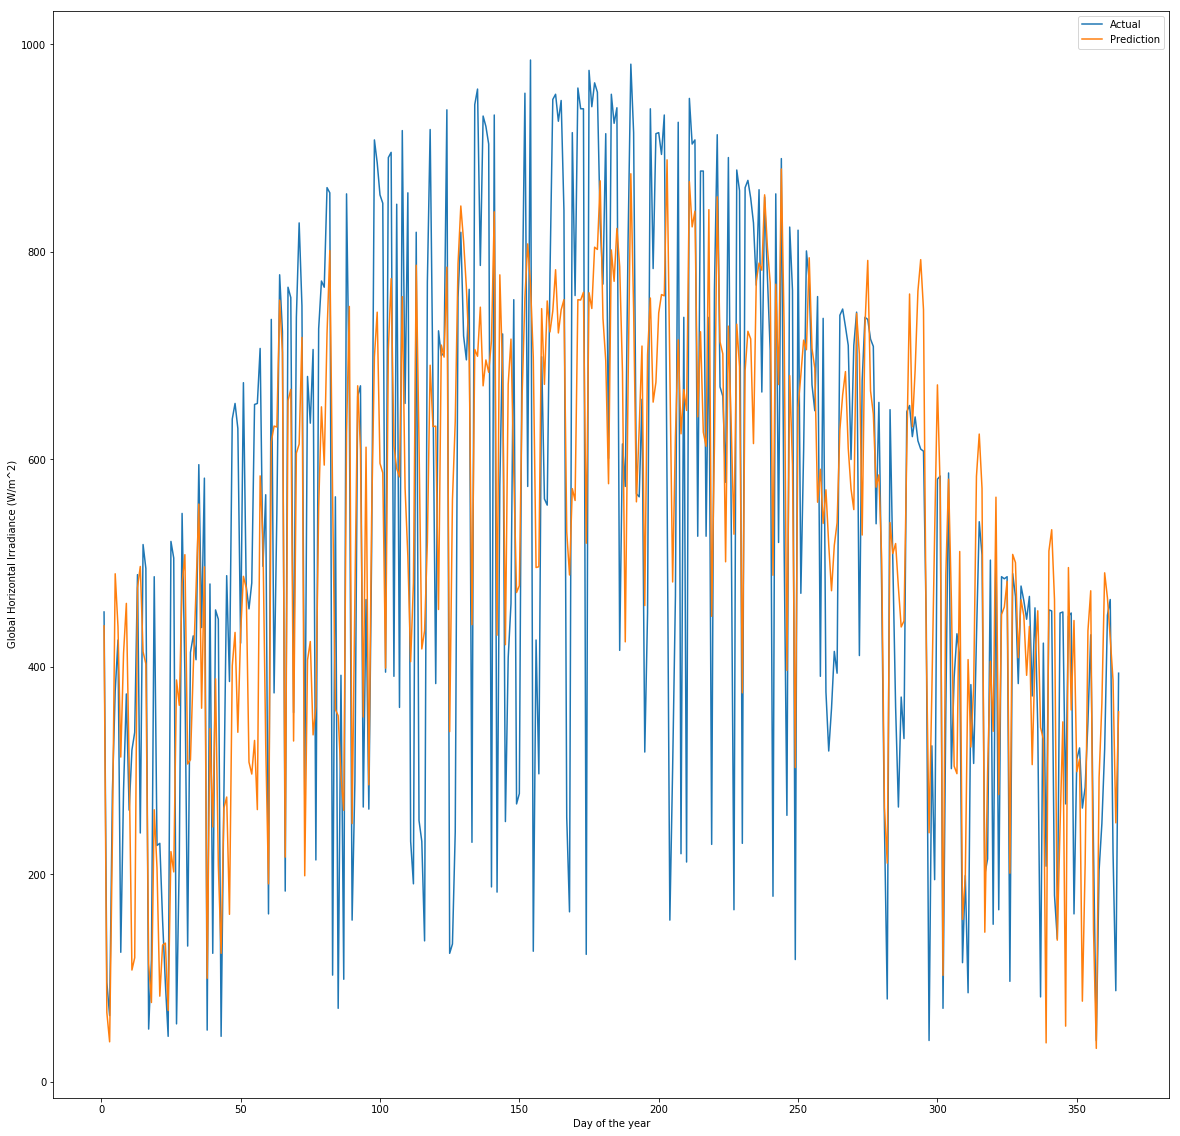

In [18]:
ytrain_pred = regr.predict(Xtrain)
plt.figure(figsize=(20,20))
plt.plot(day_of_yr,ytrain)
plt.plot(day_of_yr,ytrain_pred)
plt.legend(['Actual','Prediction'])
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Day of the year')

In [19]:
#Printing the accuracy
regr.score(Xtrain,ytrain)  

0.5775489112559785

the polynomial coefficients for the training data are: [-1.38286105e-02  4.95062818e+00  2.40263876e+02]
the R^2 value for this model is: 0.2718275818397031


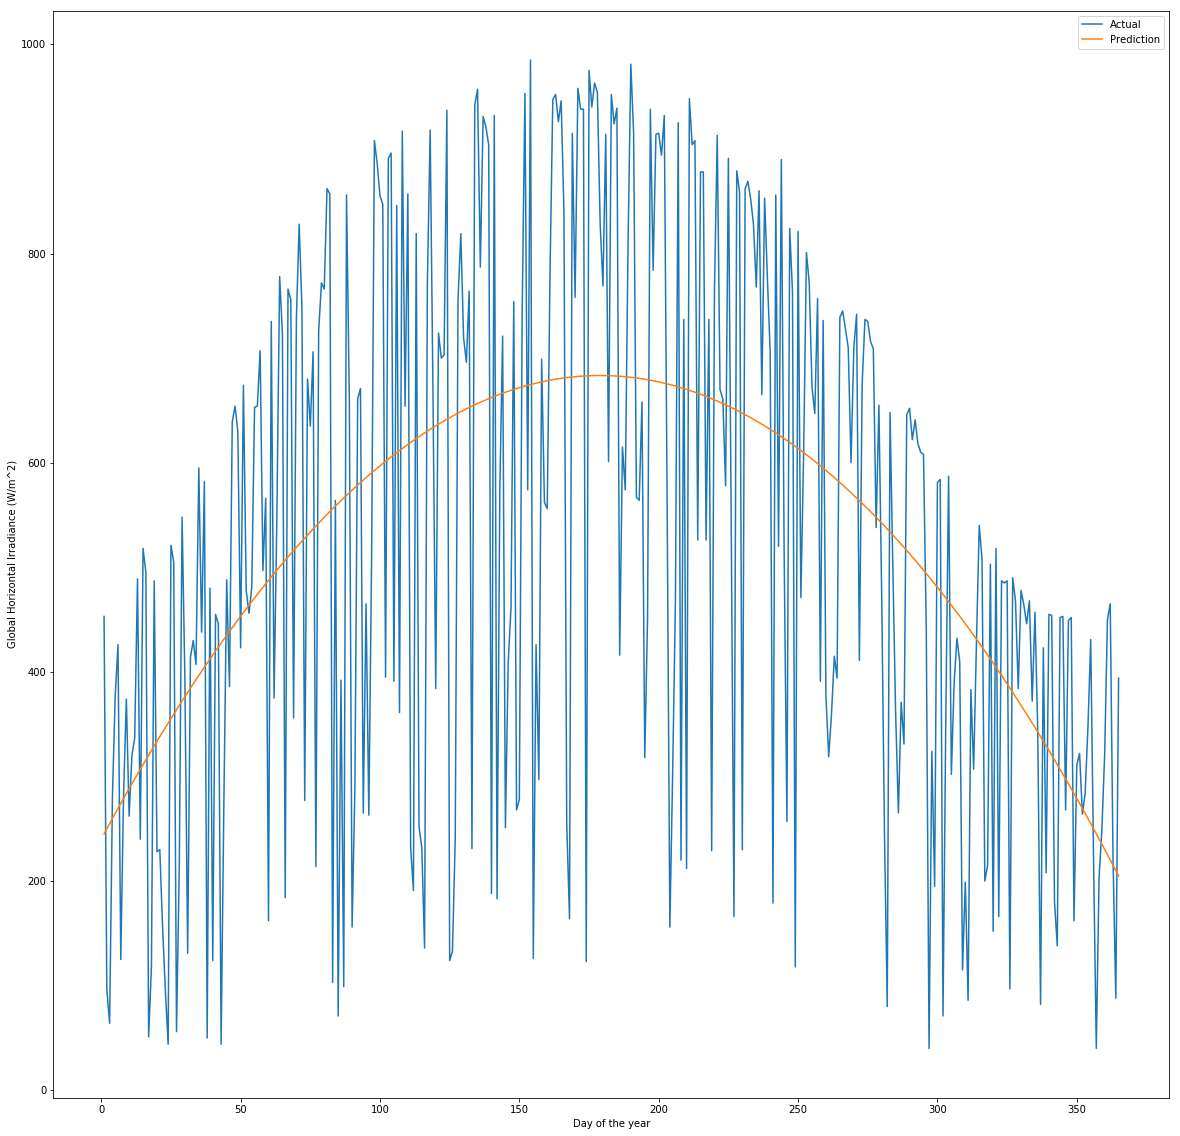

In [20]:
#another simple way of predicting the GHI for a given day of the year is to model it as a polynomial based on 
#the day of the year
beta_train = np.polyfit(day_of_yr, ytrain,2)
ytrain_polyPred = beta_train[0]*(day_of_yr**2)+beta_train[1]*(day_of_yr)+beta_train[2]

plt.figure(figsize=(20,20))
plt.plot(day_of_yr,ytrain)
plt.plot(day_of_yr,ytrain_polyPred)
print('the polynomial coefficients for the training data are: '+str(beta_train))
#for trainin data model is: 0.014(x^2)+4.95x+240

RSS=np.mean((ytrain-ytrain_polyPred)**2)
ym = np.mean(ytrain)
syy = np.mean((ytrain-ym)**2)
RSS_train = RSS/(syy)
print('the R^2 value for this model is: '+str(1-RSS_train))
plt.xlabel('Day of the year')
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.legend(['Actual','Prediction'])

For a comparison and a measure of accuracy, the data set for 2016 was made into the test data for the linear model that was just previously generated from the training data.

The Coefficients are: [-8.59654924 -7.9738566 ]
The Intercept is: 1418.3315879138293


Text(0.5,0,'Day of the Year')

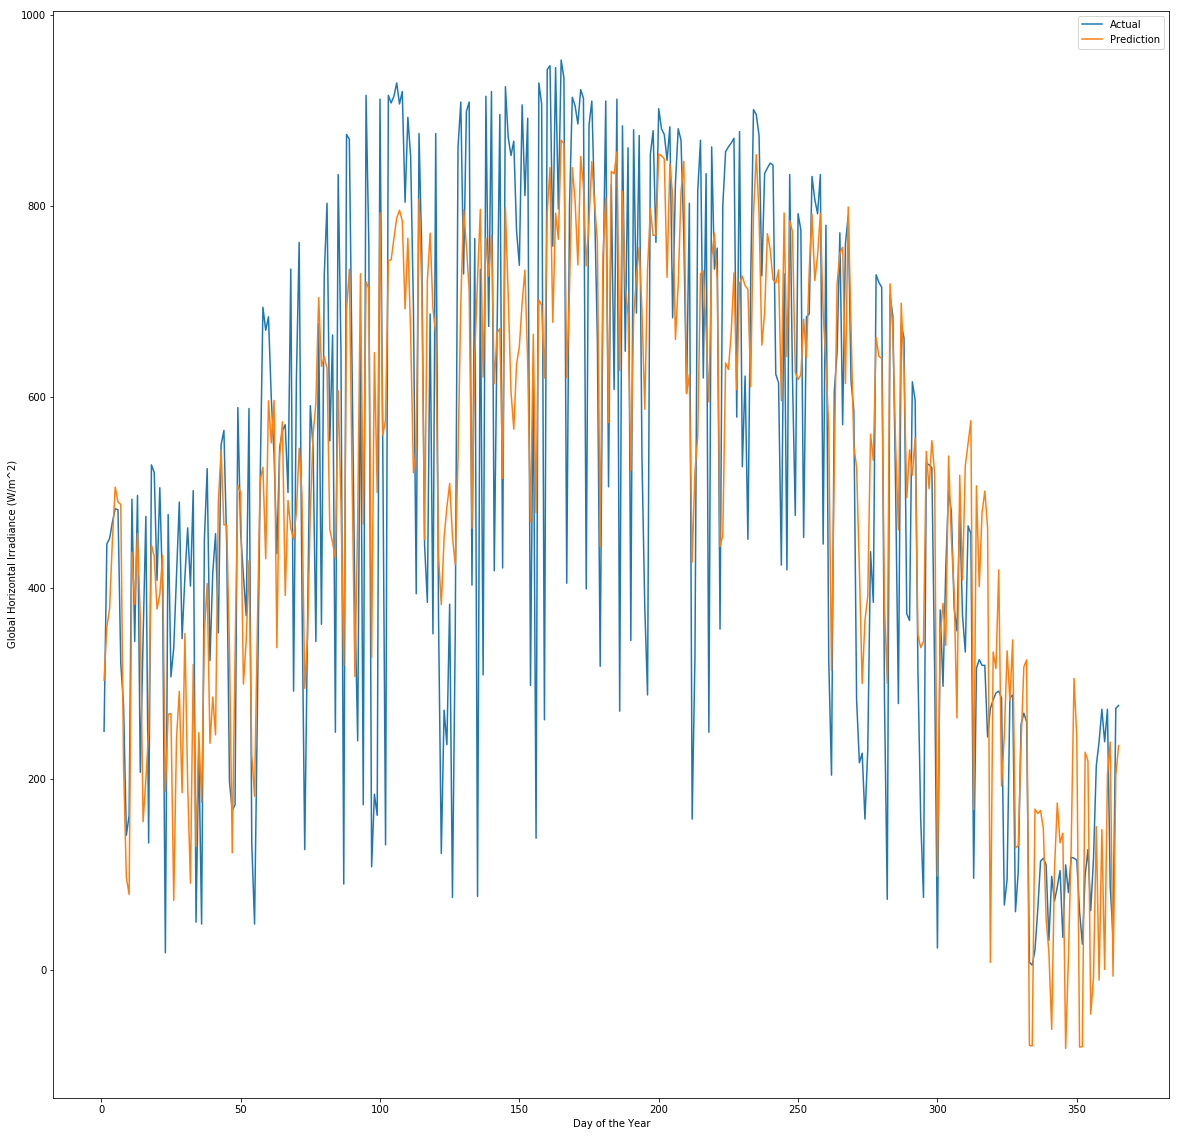

In [21]:
#Pulling year 2016 as test data and fitting a linear regression model on it
df2 = pd.read_excel('2016 Data.xlsx')
nsamp, natt = df2.shape

hr2 = np.array(df2['Hour'])
Day2 = np.array(df2['Day'])
GHI2 = np.array(df2['GHI'])
SZA2 = np.array(df2['Solar Zenith Angle'])
PW2 = np.array(df2['Precipitable Water'])
RH2 = np.array(df2['Relative Humidity'])

day_of_yr2 = np.arange(1,366)
pkGHI2 = np.zeros(365)
pkSZA2 = np.zeros(365)
pkPW2 = np.zeros(365)
pkRH2 = np.zeros(365)
dayInd2 = 0

for i in range(nsamp):
    if (hr[i] == 12):
        pkGHI2[dayInd2] = GHI2[i]
        pkSZA2[dayInd2] = SZA2[i]
        pkPW2[dayInd2] = PW2[i]
        pkRH2[dayInd2] = RH2[i]
        dayInd2  = dayInd2 + 1

ytest = pkGHI2
Xtest = np.column_stack((pkSZA2.reshape(-1,1),pkRH2.reshape(-1,1)))
regr.fit(Xtest,ytest)
print('The Coefficients are: '+str(regr.coef_))
print('The Intercept is: '+str(regr.intercept_))

ytest_pred = regr.predict(Xtest)

plt.figure(figsize=(20,20))
plt.plot(day_of_yr2,ytest)
plt.plot(day_of_yr2,ytest_pred)
plt.legend(['Actual','Prediction'])
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Day of the Year')

In [22]:
#Printing the accuracy
regr.score(Xtest,ytest) 

0.6852270287696306

In [23]:
beta_test = np.polyfit(day_of_yr2, ytest,2) #

the polynomial coefficients for the test data are: [-1.78213405e-02  6.00833652e+00  2.08419785e+02]
the R^2 value for this model is: 0.34479179347231903


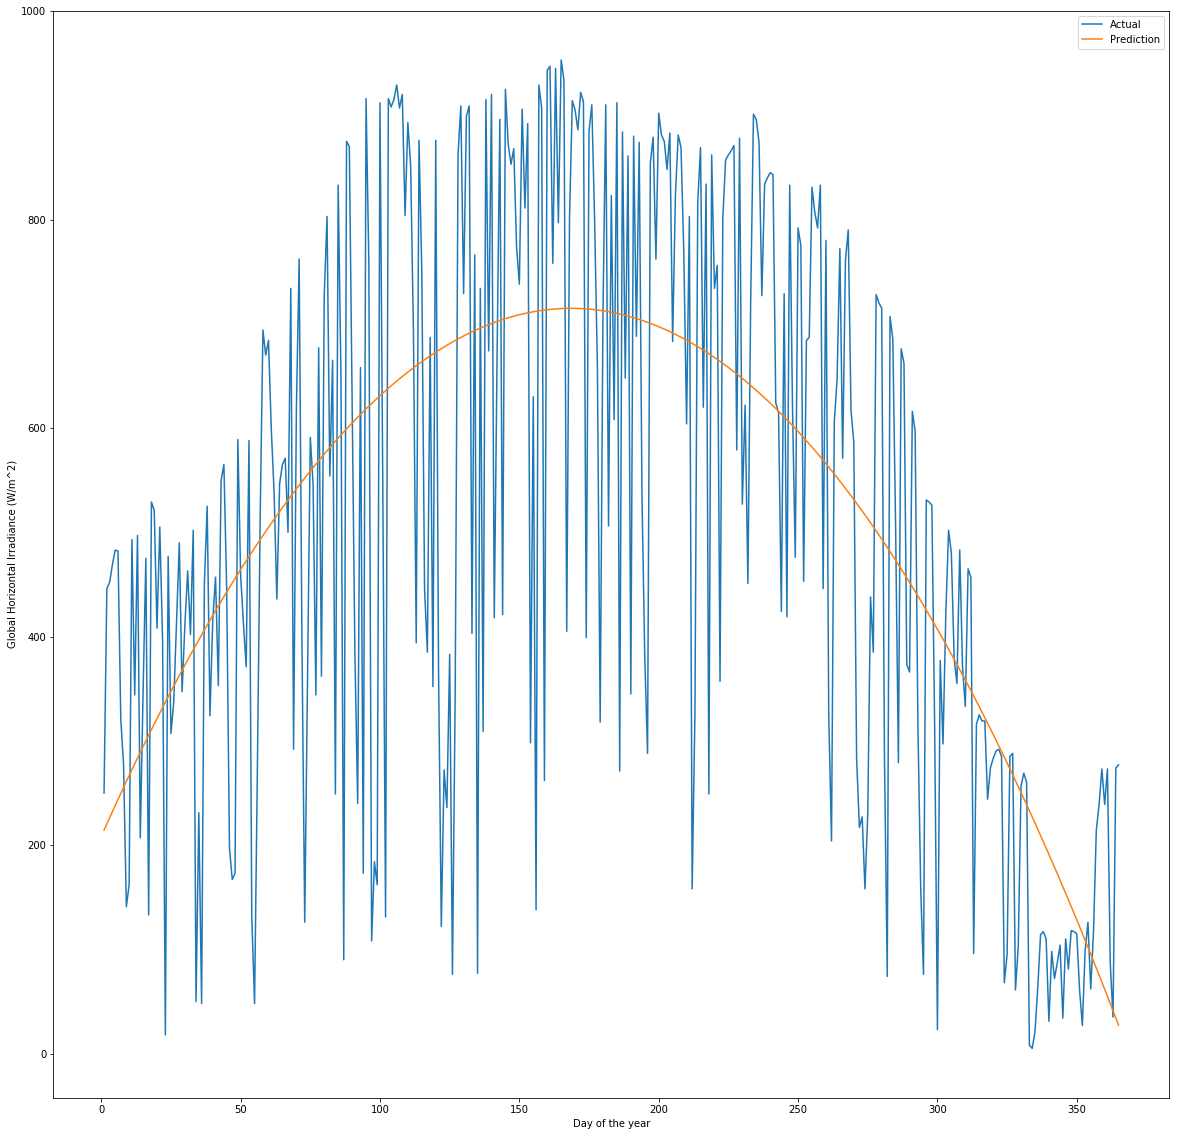

In [24]:
ytest_polyPred = beta_test[0]*(day_of_yr2**2)+beta_test[1]*(day_of_yr2)+beta_test[2]

plt.figure(figsize=(20,20))
plt.plot(day_of_yr2,ytest)
plt.plot(day_of_yr2,ytest_polyPred)
plt.xlabel('Day of the year')
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.legend(['Actual','Prediction'])

print('the polynomial coefficients for the test data are: '+str(beta_test))
#for test data model is: 0.018(x^2)+6x+208
RSS2=np.mean((ytest-ytest_polyPred)**2)
ym2 = np.mean(ytest)
syy2 = np.mean((ytest-ym2)**2)
RSS2_test = RSS/(syy2)
print('the R^2 value for this model is: '+str(1-RSS2_test))

The linear model came out to be:

y = 1279.971 - 8.396$x_{1}$ - 5.991$x_{2}$

Applying this linear model to the 2016 test data set gave us a near 75% prediction accuracy for Global Horizontal Irradiance. This is a good result for the weather data variables that were chosen. Correlations between the variables were never so great, making it difficult to generate a highly accurate result.

In conclusion, this linear regression model was able to produce satisfactory results for GHI with respect to weather variables. This graph could be interpreted in a manner that would help energy companies decide if solar panel implementation would be viable in certain locations. All of this data was for one location: Central Park. By looking at the levels of GHI, these energy companies could have an estimate to see if solar energy would be profitable in areas around the world with respect to their weather conditions. 